<a href="https://colab.research.google.com/github/surayaqis/Data-Science-Project/blob/main/P166248_Week7_DataLoading_Storage_20251122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 07: <font color='green'>Data Loading and Storage</font>**

#### **For details of this Topic (Data Loading, Storage, and File Formats), please refer to the textbook: "Python for Data Analysis" by Wes McKinney: https://wesmckinney.com/book/**

#### **Mount to Google Drive**

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Import Pandas and NumPy library**


In [ ]:
# Import the library
import pandas as pd
import numpy as np

## **Reading in and Writing Data in Text Format:** <font color='red'>\*.csv*</font> or <font color='red'>\*.txt</font> **format**

# **csv -> comma separated value**

In [ ]:
# Download the ex1.csv file here: https://tinyurl.com/yheh3evw
# Upload ex1.csv to Google Drive
from google.colab import files
files.upload()

## Shell Command
- A shell command is an **instruction** given to the computer's **operating system (OS)** through a command-line interpreter
- often called a **'shell'**.

In [ ]:
# Check where is the ex1.csv file being uploaded
# pwd -> "print working directory"
!pwd

In [ ]:
# read files sequentially and print their contents
# cat() function - read and output the ex1.csv content
# cat() is called 'concatenate' -> to display the contents of a file
# the "!" is to run a shell command
!cat /content/ex1.csv

In [ ]:
# Read the file using the read_table() function
# Without specifying the delimter
# There is an error message here -> the data is not in the dataframe format
df = pd.read_table('/content/ex1.csv')  #copy the path from content/ex.csv (right click and copy path)
df

In [ ]:
# Specified the delimiter: csv -> ','
pd.read_table('/content/ex1.csv', sep = ',')  #separate the data by comma

# **Reading data directly from github**

In [ ]:
# Get it from this URL: https://tinyurl.com/yc39yfdj
# Must be in RAW format
url = "https://tinyurl.com/4d89nnv5"

# Read using the read_csv() function
df = pd.read_csv(url)
df

# **A file without header**

In [ ]:
# Download ex2.csv raw data directly from GitHub
# Using this URL: https://tinyurl.com/y4xd66my
# ex2.csv does not have header
# Python will assign column name automatically
url = 'https://tinyurl.com/y4xd66my'
df = pd.read_csv(url, header=None)
df

In [ ]:
# Specify the column names ourself
# Use this URL: https://tinyurl.com/y4xd66my
pd.read_csv(url, names=['UKM', 'fruit', 'num_car', 'pet', 'keywords'])

In [ ]:
# Set which specific column as the index
# "names" -> expecting a list of strings representing the desired column names
# index_col -> the column used as the index (row labels) for the DataFrame
# Use this URL: https://tinyurl.com/y4xd66my
names=['a', 'book', 'cat', 'donkey', 'elephant']
pd.read_csv(url, names = names, index_col = 'book')

### **Table without a fixed delimiter**
- **sep=r'\s+'** denote one or more whitespace characters (**spaces, tabs, newlines**)
- `r` -> **raw string**

In [ ]:
res = pd.read_table('https://tinyurl.com/2e2y7jh2',
                    sep=r'\s+')
res

### **Files with comments embedded**

In [ ]:
# Load ex4.csv here: https://tinyurl.com/mr4ex879
# Using skip rows as parser function
pd.read_table('https://tinyurl.com/mr4ex879',
              skiprows = [0, 2, 3], sep = ',')

In [ ]:
# Another method: Use the "comment" function
# URL: https://bit.ly/3HXjXUR
pd.read_table('https://tinyurl.com/mr4ex879',
              comment = '#', sep = ',')

# **Dealing with files with <font color='red'>missing data</font>**

In [ ]:
# Files with missing values
# Download ex5.csv here: https://tinyurl.com/yc4v35d6
# Handle missing values - NaN (Not a Number)
res = pd.read_csv('https://tinyurl.com/yc4v35d6', na_values=['NULL'])
res

In [ ]:
# Check the presence of null value - True of False
pd.isnull(res)

## **Sentinels**
* serve as **placeholders for specific conditions** or **special values** within pandas data structures.
* <font color='red'>`Missing data`: `NaN`</font> is the most common sentinel, representing **missing or undefined values**.

In [ ]:
# Specified sentinels - unique placeholder values
# Get the raw data for ex5.csv here: https://tinyurl.com/yc4v35d6
print(res)
print("\n------------------------------------\n")

sentinels = {'message': ['foo'], 'something': ['two']}
pd.read_csv('https://tinyurl.com/yc4v35d6', na_values=sentinels)

## **Reading Text Files in Pieces**
### When ***processing very large files***, we may want to read only a small piece of a file

In [ ]:
# Change pandas display settings to become more compact
# Setting the maximum number of rows to 8
pd.options.display.max_rows=6

In [ ]:
# Read a large csv file - display only six rows
# Download ex6.csv here: https://tinyurl.com/3dv6buw8
# pd.options.display.max_rows=6
res = pd.read_csv('https://tinyurl.com/3dv6buw8')
res

In [ ]:
# Only display a small number of rows
pd.read_csv('https://tinyurl.com/3dv6buw8', nrows = 15)

## **Write the data**

In [ ]:
# Read ex5.csv: https://tinyurl.com/yc4v35d6
dat = pd.read_csv('https://tinyurl.com/yc4v35d6')
dat

In [ ]:
# Write data
dat.to_csv('/content/drive/MyDrive/STQD6014/Example_Data/Suraya.csv')

In [ ]:
# Display output of the written file
!cat /content/drive/MyDrive/STQD6014/Example_Data/Suraya.csv

### **Working with Other Delimited Formats**

In [ ]:
# Other delimiters: using a pipe "|" or "@" or "^"
# sys.stdout - prints the out to the console instead of writing
import sys
dat.to_csv(sys.stdout, sep=';')

In [ ]:
# Fill missing data with some string representation
# na_rep: missing data representation
dat.to_csv(sys.stdout, na_rep='@')

In [ ]:
# Disable row and column label
dat.to_csv(sys.stdout, index = False, header = False)

In [ ]:
# Write subset of the dataframe: a, b, c
print(dat)
print("\n------------------------------------\n")

dat.to_csv(sys.stdout, index = False, columns = ['a', 'b', 'c'])

### **Pandas Series is a one-dimensional labeled array**
* the associated array of labels is called the **index**
* capable of holding data of any type
    * <font color='red'>***integer, string, float, python objects***</font>, etc

In [ ]:
# By default, international accepted date format: YYYY-MM-DD
dates = pd.date_range('22/11/2025', periods = 7)
dates

In [ ]:
# Pandas can incorporate NumPy function -> np.arange
# np.arange returned an array range instead of list
dates = pd.date_range('22/11/2025', periods = 7)
ts = pd.Series(np.arange(7), index = dates)

# Save it to your own folder
ts.to_csv('/content/drive/MyDrive/STQD6014/Example_Data/tseries01.csv')

### **Convert string to date format**

In [ ]:
# To specify the exact date format
date_string = '22-25@11'
date_format = '%d-%y@%m'

# Convert the date string to a datetime object
start_date = pd.to_datetime(date_string, format = date_format)

# Generate a date range with specified start date and periods
date_range = pd.date_range(start_date, periods = 7)

# Output the date range
print(date_range)

In [ ]:
# Starts November 22 (Sat), for seven periods; Week start on Wednesday
dates = pd.date_range('22/11/2025', periods = 7, freq = ('W-MON'))
dates

### **JSON Data format** - short for ***J***ava***S***cript ***O***bject ***N***otation
1. one of the standard formats for sending data by HTTP request between web
browsers and other applications
2. much more free-form data format than a tabular text form like CSV
3. basic types are objects (***dictionaries***), arrays (***lists***), strings, numbers, Booleans, and nulls.
4. <font color='red'>all of the ***keys*** in an object must be ***strings***</font>

In [ ]:
# Triple quote -> """ -> docstring
obj = """
{"name": "Wes",
  "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
  "pet": null,
  "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
               {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]
}
"""

In [ ]:
# Convert string to Python form named res
# 'res' would be a dictionary representing the parsed JSON data
# this case it is a library
import json
res = json.loads(obj)
res

In [ ]:
# Converts Python object back to JSON
json.dumps(res)

In [ ]:
# Convert JSON object to DataFrame
siblings = pd.DataFrame(res["siblings"], columns = ['name', 'hobbies'])
siblings

In [ ]:
# Extract the city information and display in a dataframe
pd.DataFrame(res["cities_lived"], columns = ['CityInfo'])

### **HTML file format**
1. The pandas.read_html function by default searches for and attempts to parse all ***tabular data*** contained within ***\<table>*** tags.
2. The result is a ***list of DataFrame objects***

In [ ]:
# Download data here: https://tinyurl.com/msaka5pd
# The filename: fdic_failed_bank_list.html
# fdic -> Federal Deposit Insurance Corporation
# This is a list of banks which have failed since October 1, 2000.
# The output is a list containing these extracted tables (as DataFrames) -> []
tbls = pd.read_html('https://tinyurl.com/msaka5pd')
tbls

In [ ]:
# Perform data cleaning and analysis
# Extract data from "Closing Date" column
# Convert to standard date accepted internationally
close_timestamps = pd.to_datetime(failures["Closing Date"])
close_timestamps

In [ ]:
# Count frequency of banks closed for each year starting from Oct 1, 2000
# dt -> DatetimeProperties
year_counts = close_timestamps.dt.year.value_counts()

# Sort the years (index) in ascending order and filter for years from 2000
filtered_and_sorted_counts = year_counts[year_counts.index >= 2000].sort_index()
display(filtered_and_sorted_counts)

# **XML (Extensible Markup Language)**
- XML provides a flexible and powerful way to **represent and exchange data** in a **structured, <font color='red'>human-readable, and machine-readable</font>** format.
- It's a foundational technology used in various domains, from web development to data analysis.
- **Does not have predefined tags**; we can define our own tags (e.g., **\<book>**, **\<author>**, **\<product>**)
- making XML **'extensible'** because we can extend it to define any data structure we need.
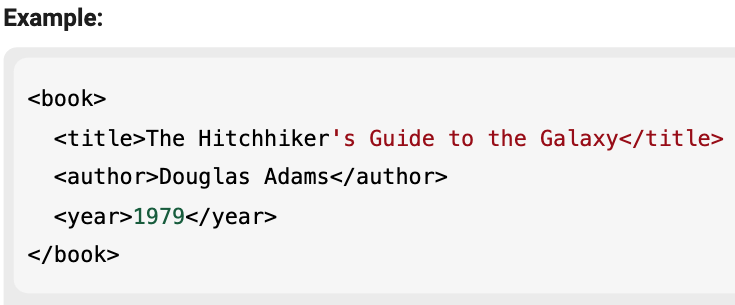

### **Parsing XML with lxml.objectify**
1. parse the file and get a reference to the root node of the XML file with getroot, i.e. ***the document node***
2. If we were describing a book using XML, for example, the root element might be **\<book>** and everything related to that book—like **\<title>**, **\<author>**, and **\<content>**—would be nested within it.

3. The root element essentially provides the overall structure and context for the rest of the information in the XML document.

# **Click here for more information about XML: https://tinyurl.com/3zdf4hab**

In [ ]:
# Import XML library
from lxml import objectify

In [ ]:
# Download and upload Performance_MNR.xml file here: https://tinyurl.com/mwmasnyp
from google.colab import files
files.upload()

In [ ]:
# Performance of train services published by The New York Metropolitan Transportation Authority (MTA)
# Get the path of the Performance_MNR.xml file
path = '/content/Performance_MNR.xml'

# parses the contents of the file using objectify.parse()
# parsing -> asking the computer to go through a file, find certain information, and make it ready for us to work with
parsed = objectify.parse(open(path))
root = parsed.getroot()

In [ ]:
# populate a dictionary of tag names to data values
data = [] # Create an empty list

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

# a for loop to access the information
for elt in root.INDICATOR:
    elt_data = {} # Create an empty dictionary
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        elt_data[child.tag] = child.pyval # the 'tag' is the key, the 'pyval' is the value; key-value pair
    data.append(elt_data)

In [ ]:
# Convert the list into a pandas DataFrame
perf = pd.DataFrame(data)
perf.head()

In [ ]:
# Sneak peek of the DataFrame
perf.head()

In [ ]:
# Complete XML DataFrame
perf2 = pd.read_xml(path)
perf2.head()

### **Binary data files**

# Binary file is not human-readable

In [ ]:
# CSV Data Formats
frame = pd.read_csv('/ex1.csv')
frame

### **Pickle format**
- converting data structures like lists, dictionaries, class instances, and more **into a byte stream** that can be stored in a file or transmitted over a network.

In [ ]:
# Store data in binary format using Python's built-in pickle function
frame.to_pickle('/content/frame_pickle')

In [ ]:
# If you really want to see what the pickle file looked like
!cat /content/frame_pickle

In [ ]:
# read pickle files
pd.read_pickle('/content/frame_pickle')

### **Parquet format**
- **open-source, column-oriented data storage format** designed for efficient data processing and analytics.
- widely used in big data ecosystems like **Hadoop, Spark, and Hive**, as well as in cloud data warehouses like Amazon Redshift and Google BigQuery

In [ ]:
# Download the Parquet binary file: fec.parquet
# Download data here: https://tinyurl.com/4t56bxjy
from google.colab import files
files.upload()

In [ ]:
# Load the data
fec = pd.read_parquet('/content/fec.parquet')
fec

### **Handling Microsoft excel files**

In [ ]:
# Download the ex1.xlsx here: https://tinyurl.com/359uwbk9
xlsx = pd.ExcelFile("https://tinyurl.com/359uwbk9")

In [ ]:
# Getting excel sheet name
xlsx.sheet_names

In [ ]:
# Retrieve data by providing sheet name
xlsx.parse(sheet_name = 'Sheet1')

In [ ]:
# Without index column
xlsx.parse(sheet_name = 'Sheet1', index_col = 0)

In [ ]:
# Another way of reading the ex1.xlsx file
frame = pd.read_excel('https://tinyurl.com/359uwbk9')
frame

### **To write pandas data to Excel format**


In [ ]:
# Output the frame content
frame

In [ ]:
# Optimized way to write xlsx file
frame.to_excel("/content/drive/MyDrive/STQD6014/Example_Data/SampleData.xlsx", sheet_name="Suraya", index=False)

### **Interacting with HDF5 files (Hierarchical Data Format version 5)**
1. intended for storing large, complex, and heterogeneous data.
2. widely used in scientific computing, data analysis, and machine learning
3. HDF5 file can **act like a container**, holding various datasets (like tables or arrays) along with their **descriptive metadata**.
4. HDF5 organizes data in a **tree-like structure**, similar to a file system.
    * allows us to **group related datasets and metadata**, making it easier to navigate and access specific information.

### **Visit here for more information about HDF5: https://tinyurl.com/3a4nrskd**




## **HTML vs XML vs HDF5**
- **HDF5**: if we're dealing with **massive scientific datasets** and **need high-performance I/O**
- **XML**: if we're exchanging structured data between applications in a text format
- **HTML**: If we're building a webpage

In [ ]:
# Working with HDF5
# Create some random number
np.random.seed(1213)
frame = pd.DataFrame({"a": np.random.standard_normal(100)})
frame

In [ ]:
# Create a HDFStore object
store = pd.HDFStore('/content/mydata.h5')

In [ ]:
# Put the data into the HDF5 file
store["obj1"] = frame

In [ ]:
# Retrieve objects contained in the HDF5 file
store["obj1"]

In [ ]:
# HDF5 support query operations in table storage format
store.put('obj2', frame, format = 'table')
print(store.select("obj2", where = ["index >= 1 and index <=4"]))

print('\n -------- \n')

store.select("obj2", where = ["index >= 1 and index <=4"]).mean()

In [ ]:
# Other HDF functions
# `path_or_buf` -> destination or source of the data
frame.to_hdf(path_or_buf='mydata.hdf5', key='obj3', format='table') # save the data into mydate.hdf5
pd.read_hdf('mydata.hdf5', 'obj3', where = ['index < 5']) # Load the mydate.hdf5 file

### **Interacting with Web APIs**
1. Web API is a ***System to System interaction***, in which the ***data*** or information from one system ***can be accessed*** by another system, after the completion of execution the output is ***shown to the viewer***.

### ***Task: To find the latest 30 GitHub issues for pandas on GitHub***

In [ ]:
# load library
import requests

In [ ]:
# first get the URL link: https://tinyurl.com/36ttfwsw
url = 'https://tinyurl.com/36ttfwsw'

In [ ]:
# Get the data
resp = requests.get(url)

# **To undestand more on HTTP status, visit this link**: http://tinyurl.com/5cm2yhcw

In [ ]:
# Check for the API status
resp.raise_for_status()
resp

In [ ]:
# Return a dictionary containing JSON parsed into native Python objects:
data = resp.json() # This is in json format

In [ ]:
# Get the first data under title
data[0]["title"]

In [ ]:
# Pass data directly to DataFrame and extract fields of interest:
issues = pd.DataFrame(data, columns = ['id', 'number', 'title', 'labels', 'state'])
issues

### **Interacting with Databases - SQL**





In [ ]:
# SQL
import sqlite3

In [ ]:
# Connect to a SQLite3 database using a 'with' statement for automatic resource management
# This ensures the connection is properly closed even if errors occur.
with sqlite3.connect('/content/mydata.sqlite') as con:
    # Create the SQL query for table creation
    query = """
    CREATE TABLE IF NOT EXISTS test
    (a VARCHAR(20), b VARCHAR(20),
    c REAL, d INTEGER
    );"""

    # Execute the table creation query and commit the changes
    con.execute(query)
    con.commit()

    # Create some data to insert
    data = [("Atlanta", "Georgia", 1.25, 6),
            ("Bangi", "Jalan Reko", 3.3, 5),
            ("Seremban", "Nilai", 5.5, 89)]

    # Create a query statement for inserting data
    # sqlite3 module will replace each ? with a corresponding value from a Python sequence (like a tuple or list)
    stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

    # Execute the insert statement for multiple rows and commit the changes
    # 'executemany' is efficient for inserting multiple records
    con.executemany(stmt, data)
    con.commit()

    # Select all data from the 'test' table
    cursor = con.execute('select * from test')

    # Fetch all the results
    rows = cursor.fetchall()

# Print rows to see the fetched data after the 'with' block is exited
rows

# **Done for the day!!!**